<a href="https://colab.research.google.com/github/Nguyen379/comapBit_Gold/blob/main/ema_sma_bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%pwd

'/content'

In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks/comap"

/content/drive/MyDrive/Colab Notebooks/comap


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('BCHAIN-MKPRU.csv')

df['Date'] = pd.to_datetime(df.Date, format="%m/%d/%y")
df.index = df['Date']

data = df.sort_index(ascending=True, axis=0)
data_small = data.copy()
print(data_small.head())
print(len(data_small))
print(data_small['Value'].shape)

                 Date   Value
Date                         
2016-09-11 2016-09-11  621.65
2016-09-12 2016-09-12  609.67
2016-09-13 2016-09-13  610.92
2016-09-14 2016-09-14  608.82
2016-09-15 2016-09-15  610.38
1826
(1826,)


In [ ]:
days = 25
def calculate_ema(prices, days, smoothing=2):
    ema = [sum(prices[:days]) / days]
    for price in prices[days:]:
        ema.append(
            (price * (smoothing / (1 + days))) + 
            ema[-1]* (1 - (smoothing / (1 + days)))
            )
    return ema
ema = calculate_ema(data_small['Value'], days)

In [ ]:
price_X = np.arange(data_small.shape[0]) # Creates array [0, 1, 2, 3, ..., df.shape[0]]
ema_X = np.arange(days, data_small.shape[0]+1) # Creates array [10, 11, 12, 13, ..., df.shape[0]+1]
                                     # We start at 10, because we use the first 10 values to calculate the SMA,
                                     # then we calculate EMA form the 11th value

print(price_X)
print(ema_X)

[   0    1    2 ... 1823 1824 1825]
[  25   26   27 ... 1824 1825 1826]


In [ ]:
data_2016 = data_small[pd.DatetimeIndex(data_small['Date']).year==2016]
print(data_2016['Value'].min())
print(data_2016['Value'].max())

594.08
963.38


In [ ]:
data_2017 = data_small[pd.DatetimeIndex(data_small['Date']).year==2017]
print(data_2017['Value'].min())
print(data_2017['Value'].max())

780.92
19498.68333


In [ ]:
data_2018 = data_small[pd.DatetimeIndex(data_small['Date']).year==2018]
print(data_2018['Value'].min())
print(data_2018['Value'].max())

3242.42
17319.198


In [ ]:
data_2019 = data_small[pd.DatetimeIndex(data_small['Date']).year==2019]
print(data_2019['Value'].min())
print(data_2019['Value'].max())

3394.76
12932.55


In [ ]:
data_2020 = data_small[pd.DatetimeIndex(data_small['Date']).year==2020]
print(data_2020['Value'].min())
print(data_2020['Value'].max())

4830.21
28856.59


In [ ]:
data_2021 = data_small[pd.DatetimeIndex(data_small['Date']).year==2021]
print(data_2021['Value'].min())
print(data_2021['Value'].max())

28982.56
63554.44


In [ ]:

first_25 = data_small['Value'].values[:25]
print(first_25.min())
print(first_25.max())

594.08
621.65


In [ ]:
find = data_small['Value'].values[:25]
print(find.min())
print(find.max())

find = data_small['Value'].values[:365]
print(find.min())
print(find.max())

find = data_small['Value'].values[365:365*2]
print(find.min())
print(find.max())

find = data_small['Value'].values[365*2:365*3]
print(find.min())
print(find.max())

find = data_small['Value'].values[365*3:365*4]
print(find.min())
print(find.max())

find = data_small['Value'].values[365*4:365*5]
print(find.min())
print(find.max())

594.08
621.65
594.08
4911.740017
3216.43
19498.68333
3242.42
12932.55
4830.21
12293.72
10227.83
63554.44


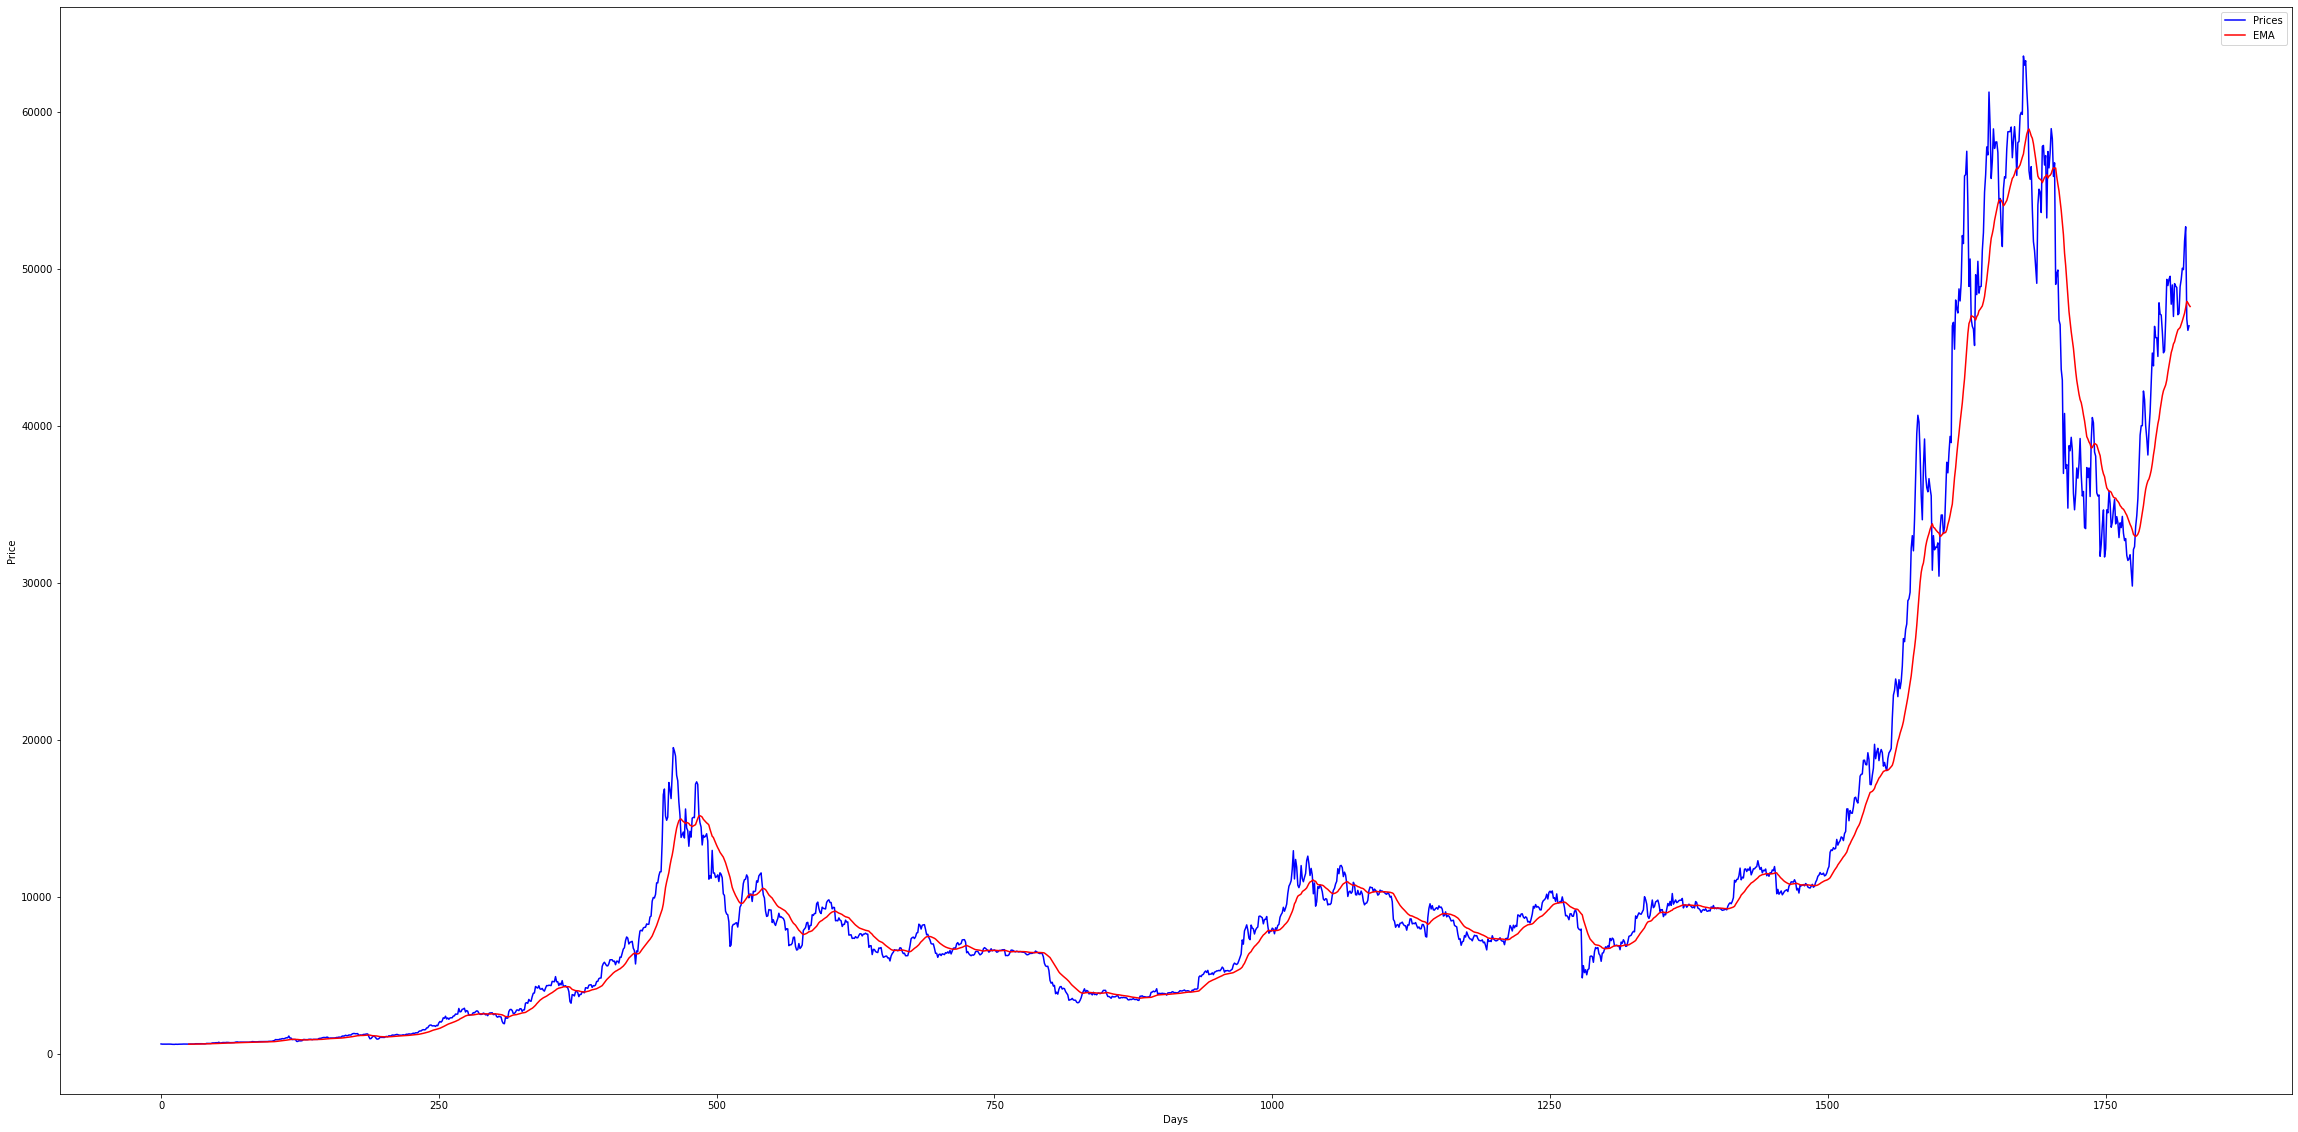

In [ ]:
plt.figure(figsize=(40,20))
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(price_X, data_small['Value'], label='Prices', c="b")
plt.plot(ema_X, ema, label='EMA', c="r")
plt.legend()
plt.show()

In [ ]:
print(data_small['Value'].shape)
ema_ = [0 for n in range(24)]
ema_.extend(ema)
data_small['EMA'] = ema_
print(data_small[1500:])


(1826,)
                 Date     Value           EMA
Date                                         
2020-10-20 2020-10-20  11758.16  11147.330300
2020-10-21 2020-10-21  11925.46  11207.186430
2020-10-22 2020-10-22  12831.56  11332.138243
2020-10-23 2020-10-23  12990.25  11459.685302
2020-10-24 2020-10-24  12944.52  11573.903355
...               ...       ...           ...
2021-09-06 2021-09-06  51769.06  47523.377315
2021-09-07 2021-09-07  52677.40  47919.840598
2021-09-08 2021-09-08  46809.17  47834.404399
2021-09-09 2021-09-09  46078.38  47699.325599
2021-09-10 2021-09-10  46368.69  47596.969014

[326 rows x 3 columns]


In [ ]:
print(data_small.shape)

(1826, 3)


Buy all or Sell all

In [ ]:
investment= [1000, 0, 0]
smallest = data_small['Value'][:25].min()
threshold = 1.1
buy = []
sell = []
wait = 0
lb = 0.1
for day in range(25, 1826):
    if day <365:
        minimum = data_small['Value'].values[:day].min()
        maximum = data_small['Value'].values[:day].max()
    else:
        minimum = data_small['Value'].values[day-365:day].min()
        maximum = data_small['Value'].values[day-365:day].max()


    BC = data_small['Value'][day]
    BC_es = data_small['EMA'][day]
    BC_es_yes = data_small['EMA'][day-1]
    if wait > 0:
        wait -= 1
    if investment[0]>0 and (BC_es/ BC_es_yes <= 1*threshold - 0.0125/2*maximum/minimum) and wait == 0:
        bc = investment[0]/1.02/BC
        investment[0]=0
        buy.append(day)
        investment[1]=bc
        investment[2]=BC
    elif investment[0] == 0 and (BC_es/investment[2] >= (1*threshold*threshold)):
        if investment[1]*BC/(investment[1]*investment[2] > (1.02/0.98)*1*threshold*threshold):
            wait = 3
            sell.append(day)
            investment[0]+=investment[1]*BC*0.98
            investment[2]=0
            investment[1]=0

print(investment)
print(buy)
print(sell)

[0, 2.6856171439981904, 54123.4]
[25, 92, 151, 188, 222, 247, 269, 341, 408, 441, 567, 595, 1441, 1526, 1564, 1584, 1626]
[89, 148, 185, 219, 244, 266, 338, 405, 438, 454, 592, 1438, 1523, 1561, 1581, 1623]


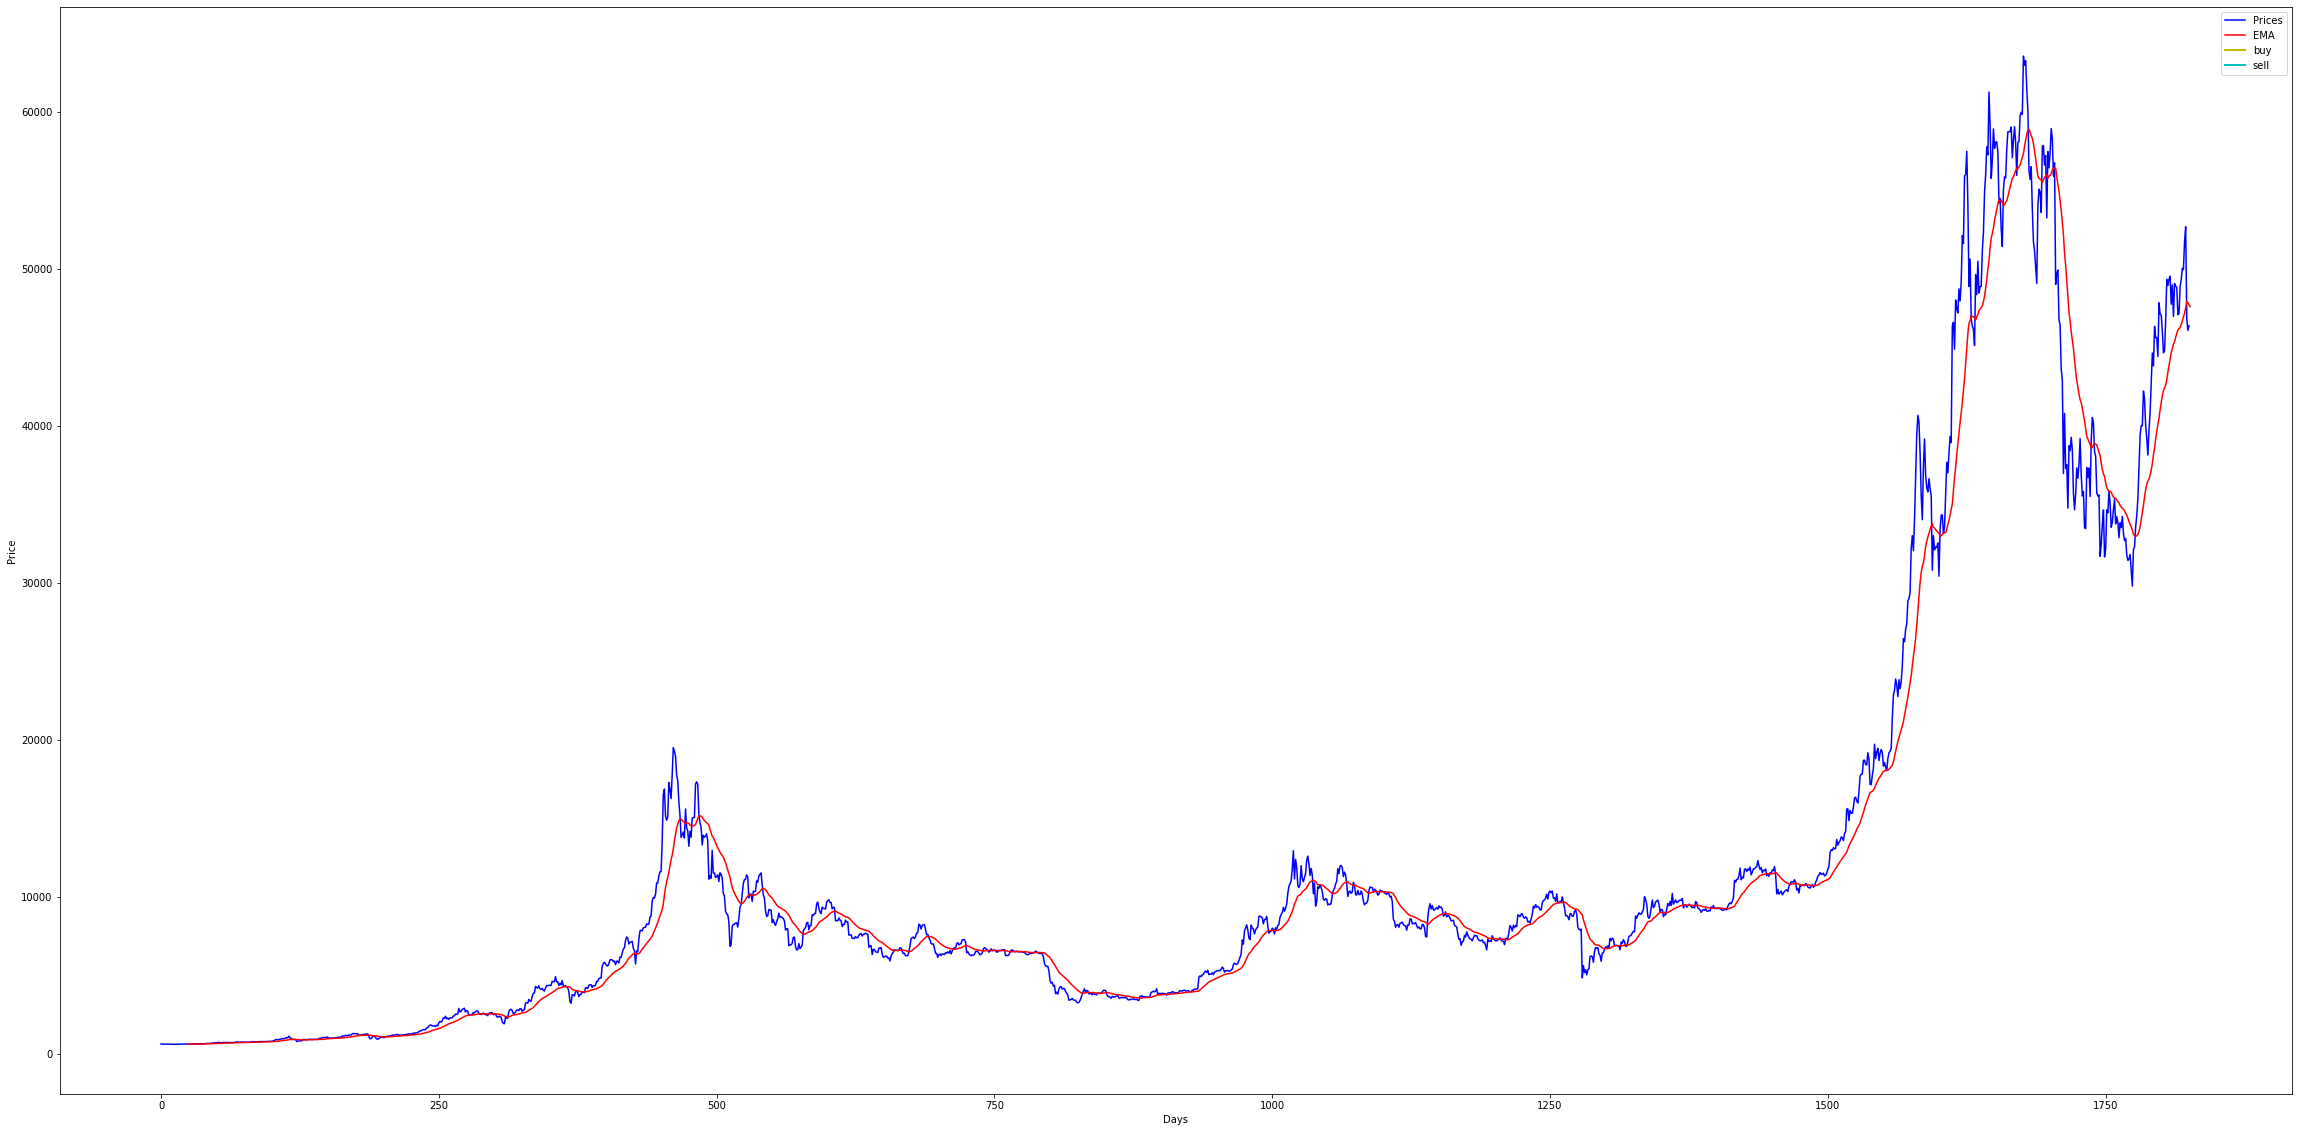

In [ ]:
plt.figure(figsize=(40,20))
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(price_X, data_small['Value'], label='Prices', c="b")
plt.plot(ema_X, ema, label='EMA', c="r")
plt.plot(buy, data_small['Value'][buy], label='buy', c='y', linewidth=2)
plt.plot(sell, data_small['Value'][sell], label='sell', c='c', linewidth=2)

plt.legend()
plt.show()
